# Comparing Batting Statistics of MLB Players from the 2018-2019 seasons to the 2020 COVID-Shortened Season

Our aim with this project is to look at the average statistics of players from the 162 game 2018-19 seasons and see how they compare to the 62 game 2020 season. The question is if the 2020 season, which was famously shortened due to the Coronavirus, gave the chance for players to overperform or underperform their previous years due to the smaller sample size.

The dataset we will be working with was custom created from MLB's Baseball Savant.

# Initial Exploration

In [1]:
##Importing Necessary Libaries##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Reading the .csv and viewing first 5 rows##
batting_stats = pd.read_csv('2018-2020 Batting Stats.csv')
batting_stats.head()

,last_name,first_name,year,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,isolated_power,xba,xslg,woba,xobp,xiso
0,Mathis,Jeff,2019,35.7,6.1,0.158,0.224,0.209,0.433,0.066,0.163,0.225,0.190,0.214,0.062
1,Sierra,Magneuris,2018,25.0,3.8,0.190,0.211,0.218,0.429,0.020,0.199,0.229,0.192,0.233,0.030
2,Leon,Sandy,2019,24.6,6.8,0.192,0.297,0.246,0.543,0.105,0.176,0.253,0.240,0.242,0.078
3,Wilson,Bobby,2018,24.5,7.9,0.178,0.281,0.238,0.520,0.104,0.172,0.253,0.232,0.242,0.080
4,DeShields,Delino,2018,21.1,10.9,0.216,0.281,0.300,0.582,0.066,0.196,0.259,0.271,0.298,0.064


In [2]:
batting_stats.tail()

,last_name,first_name,year,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,isolated_power,xba,xslg,woba,xobp,xiso
1001,Harper,Bryce,2020,17.6,20.1,0.268,0.542,0.418,0.960,0.274,0.307,0.657,0.393,0.451,0.350
1002,Freeman,Freddie,2020,14.1,17.2,0.341,0.640,0.462,1.102,0.299,0.341,0.660,0.449,0.462,0.320
1003,Trout,Mike,2019,20.0,18.3,0.291,0.645,0.438,1.083,0.353,0.311,0.676,0.436,0.457,0.365
1004,Voit,Luke,2018,26.7,10.6,0.322,0.671,0.398,1.069,0.350,0.300,0.677,0.447,0.378,0.378
1005,Soto,Juan,2020,14.3,20.9,0.351,0.695,0.490,1.185,0.344,0.332,0.691,0.470,0.476,0.359


In [3]:
##Renaming columns for ease of use##
batting_stats.rename({'b_k_percent': 'k_percent', 'b_bb_percent': 'bb_percent'}, axis=1, inplace=True)

Above, we see our first look at the dataset. Along with a player's first and last names, and the season in which the stats are coming from, there are several commonplace baseball metrics:
 - K% (Strikeouts)
 - BB% (Walks)
 - Batting Average
 - Slugging Percentage
 - On-Base Percentage
 - OPS (On-Base + Slugging)
 
There are also several sabermetric statistics that we will define below:
 - Isolated Power (ISO) - Measures a batter's ability to generate extra base hits, calculated by Slugging Percentage - Batting Average.
 - Expected Batting Average (xBA) - Measures the expected batting average of a player based on hit probability.
 - Expected Slugging (xSLG) - Measures the expected slugging percentage of a player based on number of bases probability of each batted ball.
 - Weighted On-Base Average (wOBA) - Measure's hitter's overall offensive value, assigns weights for each type of hit based on a year's run environment.
 - Expected On-Base Percentage (xOBP) - Measures expected OBP of a hitter based on hit probability and walk chance.
 - Expected Isolated Power (xISO) - Expected Isolated Power, taking into account a player's hard hit ball percetnage, the percentage of fastballs they receieve, and pull percentage.

## Grouping by Year

Firstly, we want to group by year. For the purpose of this analysis, the consideration will be between a player's stats for 2020 and an average stat between 2018 and 2019.

In [4]:
##Creating One Column for Player Names##
batting_stats['player_name'] = batting_stats['first_name'] + ' ' + batting_stats['last_name']
del batting_stats['last_name']
del batting_stats['first_name']

In [5]:
##Putting player_name first##
cols = batting_stats.columns.tolist()
cols = cols[-1:] + cols[:-1]
batting_stats = batting_stats[cols]
batting_stats.tail()

,player_name,year,k_percent,bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,isolated_power,xba,xslg,woba,xobp,xiso
1001,Bryce Harper,2020,17.6,20.1,0.268,0.542,0.418,0.960,0.274,0.307,0.657,0.393,0.451,0.350
1002,Freddie Freeman,2020,14.1,17.2,0.341,0.640,0.462,1.102,0.299,0.341,0.660,0.449,0.462,0.320
1003,Mike Trout,2019,20.0,18.3,0.291,0.645,0.438,1.083,0.353,0.311,0.676,0.436,0.457,0.365
1004,Luke Voit,2018,26.7,10.6,0.322,0.671,0.398,1.069,0.350,0.300,0.677,0.447,0.378,0.378
1005,Juan Soto,2020,14.3,20.9,0.351,0.695,0.490,1.185,0.344,0.332,0.691,0.470,0.476,0.359


In [6]:
# ##Separating 2020 Season##
twenty_bool = batting_stats['year'] == 2020
twenty_stats = batting_stats[twenty_bool]

##Averaging 2018 and 2019 Seasons##
two_seasons = batting_stats[batting_stats['year']!= 2020]
two_seasons = two_seasons.groupby('player_name').mean()

##Substituting Year Values for 'avg'##
two_seasons = two_seasons.assign(year='2018-19 avg') #the .assign() function helps avoid copy warnings
two_seasons = two_seasons.reset_index()

## Cleaning the Data

In order to plot data properly, we need to limit the datasets to only players who appear in both datasets. Doing so, we will lose roughly 700 data points, but the 191 that will remain should suffice for our analytics purposes.

In [86]:
###Creating lists of all players###
two_players = two_seasons['player_name'].values.tolist().copy()
twenty_players = twenty_stats['player_name'].values.tolist().copy()

###Iterating over 2018-19 list and setting those who aren't in 2020 list to null###
for i in two_players:
    if i not in twenty_players:
        two_seasons.loc[two_seasons['player_name'] == i, 'truth'] = np.nan
    else:
        two_seasons.loc[two_seasons['player_name'] == i, 'truth'] = True
        
###Dropping the null values###
two_seasons_cleaned = two_seasons.dropna().copy()

###Repeating with 2020 list###
two_cleaned_players = two_seasons_cleaned['player_name'].values.tolist()
for i in twenty_players:
    if i not in two_cleaned_players:
        twenty_stats.loc[twenty_stats['player_name'] == i, 'truth'] = np.nan
    else:
        twenty_stats.loc[twenty_stats['player_name'] == i, 'truth'] = True
twenty_stats_cleaned = twenty_stats.dropna().copy()

# ###Confirming identical shapes###
print(two_seasons_cleaned.shape)
print(twenty_stats_cleaned.shape)

(191, 15)
(191, 15)


In [8]:
# ###Removing 'truth' column###
twenty_stats_cleaned = twenty_stats_cleaned.drop('truth', axis=1)
two_seasons_cleaned = two_seasons_cleaned.drop('truth', axis=1)

###Sorting data alphabetically###
twenty_stats_cleaned = twenty_stats_cleaned.sort_values('player_name', ascending=True)
two_seasons_cleaned = two_seasons_cleaned.sort_values('player_name', ascending=True)

###Resetting Indicies###
twenty_stats_cleaned = twenty_stats_cleaned.reset_index()
two_seasons_cleaned = two_seasons_cleaned.reset_index()

# Visual Analysis

## Creating Scatter Plots

Now that our datasets are equivalent in size and player population, we can begin to graph scatter plots of the statistics in the dataset. Additionally, we can add translucent lines with a slope of one between the axes to add visual clarity to how many players outperformed their averages in 2020 and how many didn't.


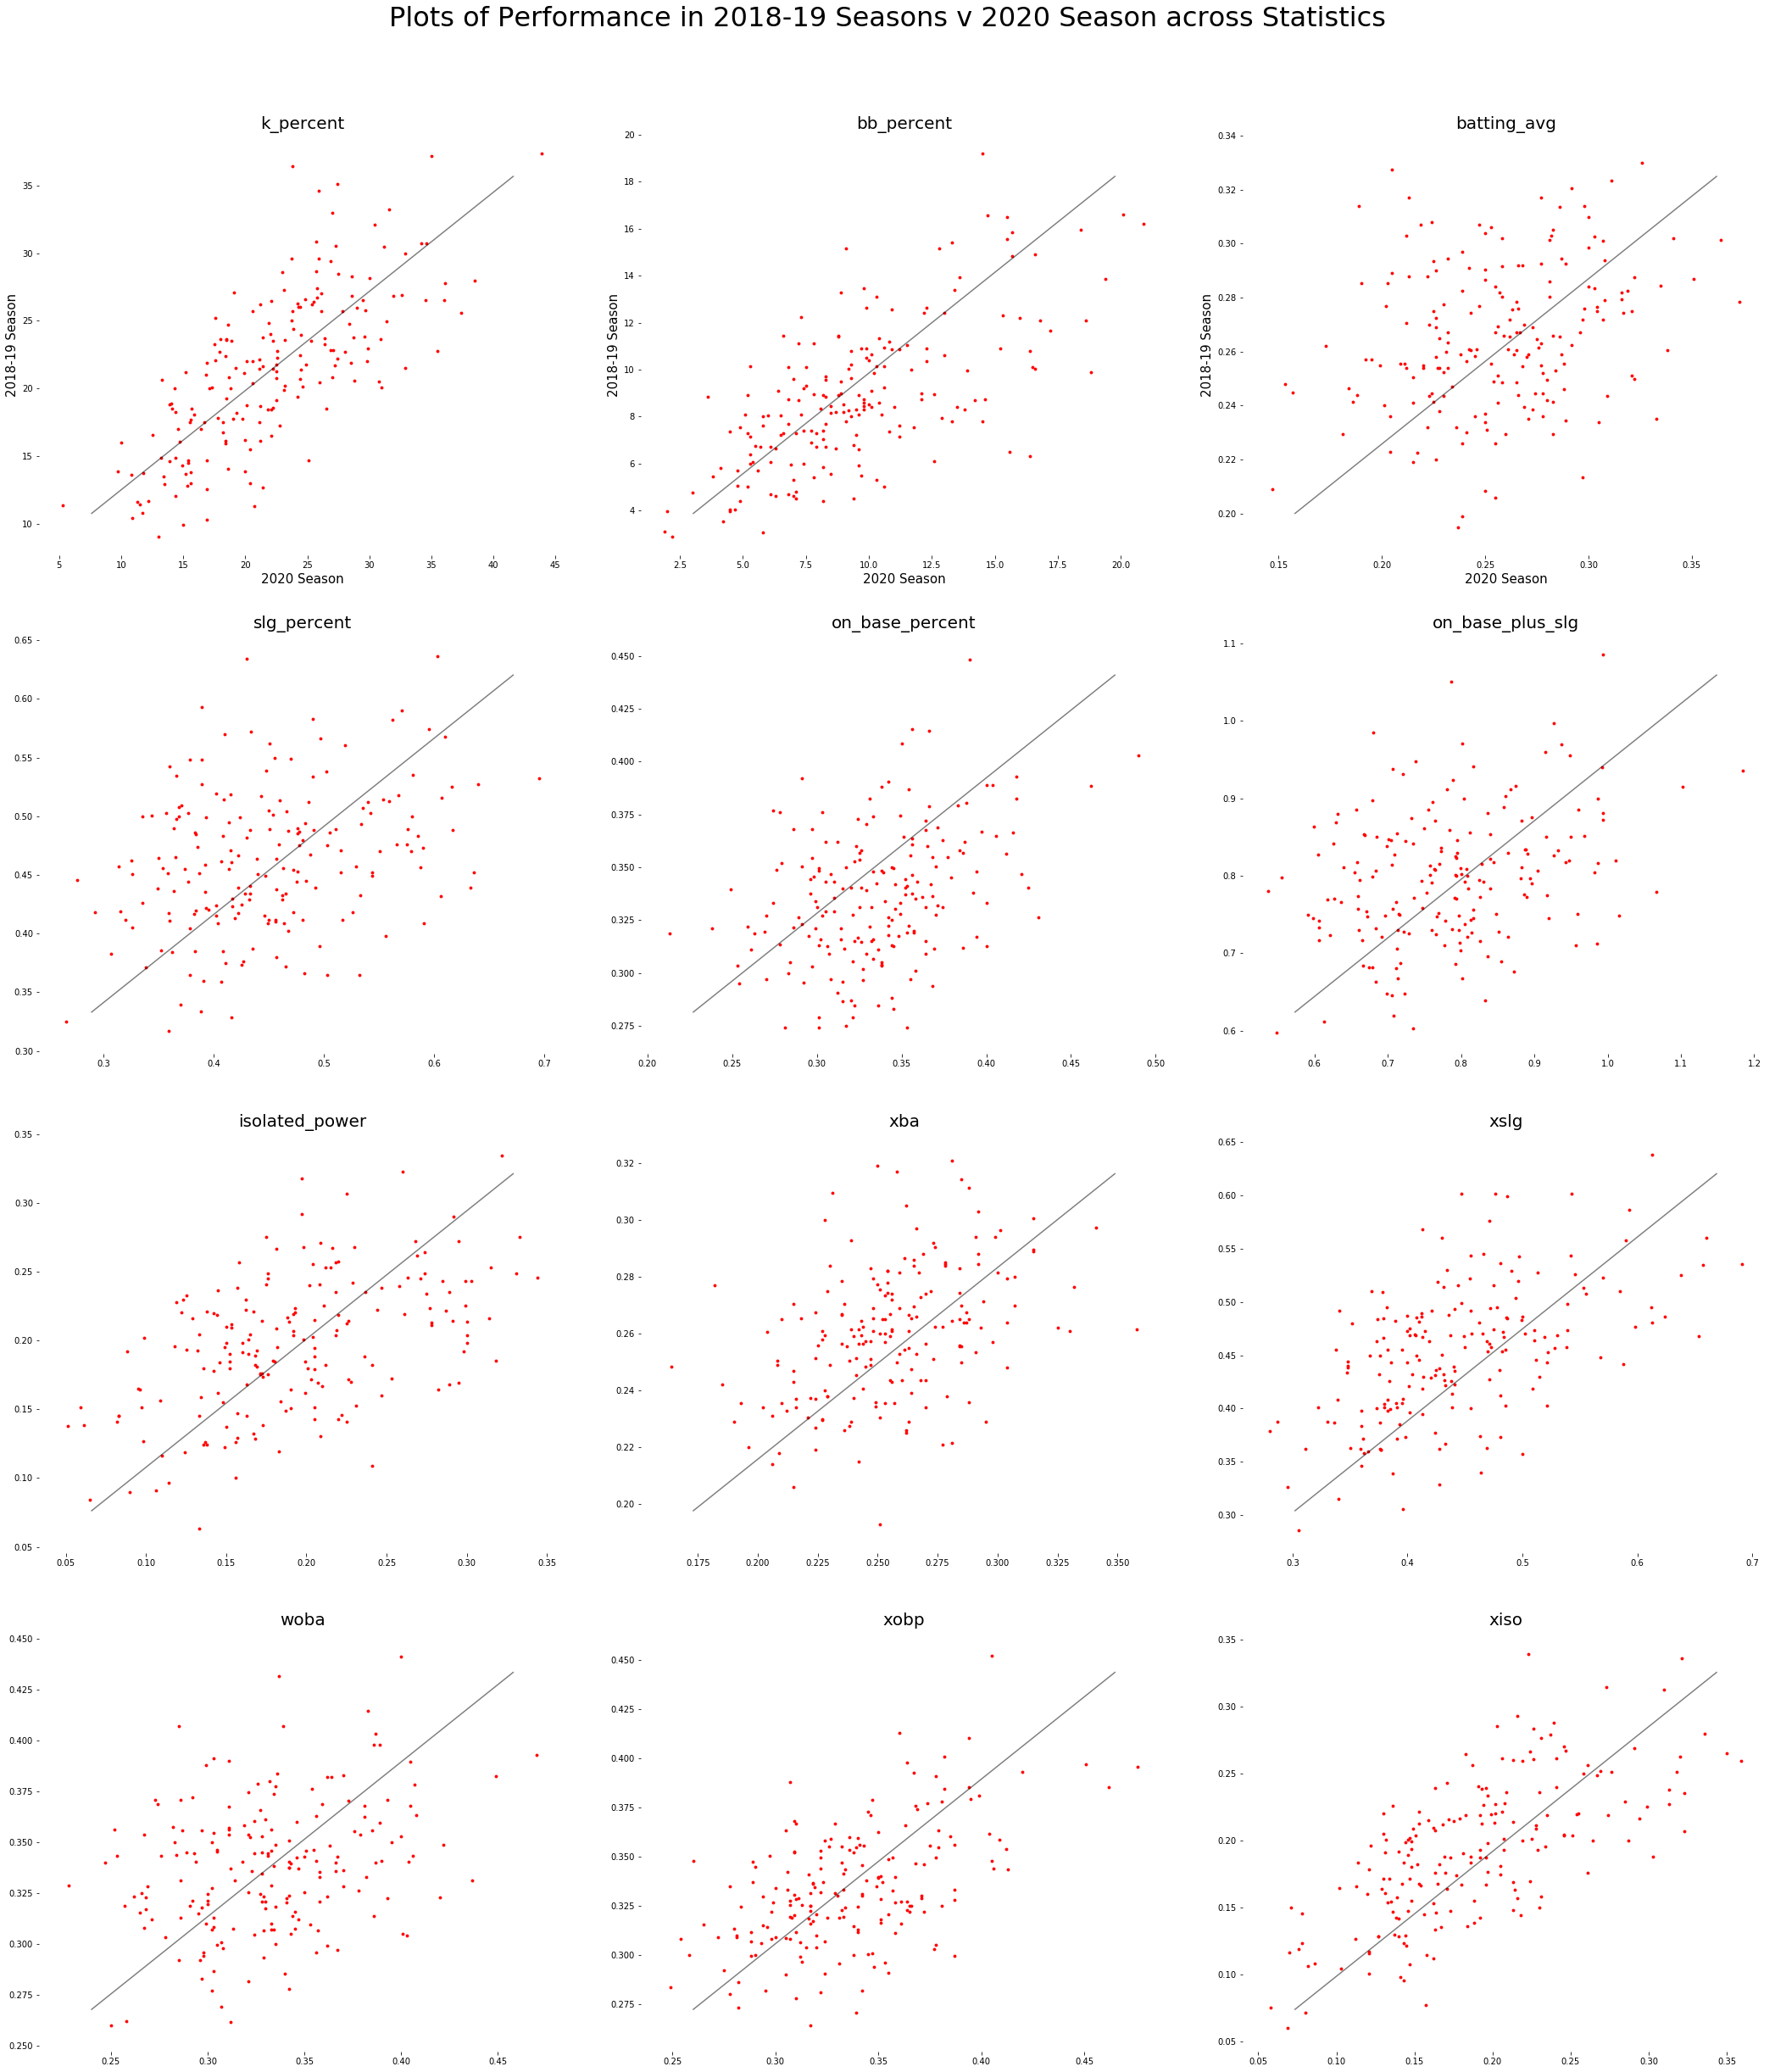

In [9]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

###Isolating the variables needed for plotting###
scatter_stats = twenty_stats.columns.drop(['player_name', 'year', 'truth']).tolist()

###Creating Scatter Plots###
fig = plt.figure(figsize=(30,35))
fig.suptitle('Plots of Performance in 2018-19 Seasons v 2020 Season across Statistics', fontsize=32)

for num in range (0,12):
    ax = fig.add_subplot(4,3,num+1)
    ax.scatter(twenty_stats_cleaned[scatter_stats[num]], two_seasons_cleaned[scatter_stats[num]],
              c='red', s=8)
    ax.set_title(scatter_stats[num], fontsize=20)
    ###Workshopping Plot for Visbility###
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    ###Adding Translucent Slope=1 Line###
    line = mlines.Line2D([.1, .9], [.1, .9], color='black', alpha=.5)
    transform = ax.transAxes
    line.set_transform(transform)
    ax.add_line(line)
    
    if num == 0:
        ax.set_xlabel('2020 Season', fontsize=15)
        ax.set_ylabel('2018-19 Season', fontsize=15)
    elif num == 1:
        ax.set_xlabel('2020 Season', fontsize=15)
        ax.set_ylabel('2018-19 Season', fontsize=15)
    elif num == 2:
        ax.set_xlabel('2020 Season', fontsize=15)
        ax.set_ylabel('2018-19 Season', fontsize=15)
        
fig.tight_layout(pad = 4)
fig.subplots_adjust(top=0.92)

## Creating a Correlation Table

To see whether there is a strong linear relationship between all the variables from year to year, we can create a correlation table using the .corrwith() method. This method is used to calculate correlation between two datasets with identical columns.

In [63]:
corr_table = twenty_stats_cleaned.corrwith(two_seasons_cleaned, axis=0)

corr_table

index               0.034485
k_percent           0.732071
bb_percent          0.666824
batting_avg         0.260443
slg_percent         0.312393
on_base_percent     0.364625
on_base_plus_slg    0.310945
isolated_power      0.498791
xba                 0.409417
xslg                0.535787
woba                0.298843
xobp                0.537675
xiso                0.680742
year                     NaN
dtype: float64

## Analysis of the Scatter Plots and Correlation Table

#### Scatter Plots
After creating scatter plots, it was immediately apparent that there is unlikely to be any correlation within a statistic's datapoints with r > .5 or r < -.5. The graphs seemed to be largely scattered, which is to be expected, given the wide range of ability found in our population of MLB players. The only scatter plots that seemed to exhibit a positive correlation were K% and BB%, which has as much to do with the pitcher as the batter during an AB, and would seemingly be more resistant to change.

#### Correlation Table
In line with what was noted after running the scatter plots, there seems to be only weak positive correlation between the seasons for a majority of the variables. The variables with stronger correlation values are xISO, K%, and BB%, which can indicate a moderate trend between the two timeframes, as they are the least likely to vary greatly.

Batting average was the variable with the weakest correlation between the timeframes. Aside from the effects of COVID, this would be a reasonable expectation as Batting Average is one of the least robust statistics in baseball and is therefore more likely to change from year-to-year regardless.

# Statistical Analysis

## Running a Sample Paired T-Test

In order to test for for statistical significance between the seasons for an individual statistic, we can perform a paired t-test.

Before that can be done however, we must test for assumed normality using the Shapiro-Wilk test, available in the _scipy.stats_ library. If the variable datasets return values above the assumed α of .05, we can then perform the t-tests.

Below, we will begin by testing only for the _batting_avg_ variable, to better understand the outputs of these tests.

In [11]:
import scipy.stats as stats

###Checking if Batting Avg Series can be assumed normal###

twenty_normality = stats.shapiro(twenty_stats_cleaned['batting_avg'])

two_normality = stats.shapiro(two_seasons_cleaned['batting_avg'])

print(twenty_normality)
print(two_normality)

(0.9972442984580994, 0.9835097193717957)
(0.9945216774940491, 0.7105699181556702)


After performing the Shapiro-Wilk test for normality, the batting average series returned p-values of .983 and .710. Therefore, we can assume both distributions are normal, and can proceed with a paired t-test.

In [12]:
###Performing a T-Test###

t_test = stats.ttest_rel(twenty_stats_cleaned['batting_avg'], two_seasons_cleaned['batting_avg'])
t_test

Ttest_relResult(statistic=-2.7942610967118027, pvalue=0.005735161670417214)

With a T Statistic of -2.79, which is lower than the critical value of -1.653 (d.f = 191, α = .05), and a p-value of .005, we can conclude a statistically significant difference between batting averages in the 2018-19 seasons and the 2020 season.

## Running Paired T-Tests

Now that we have a better understanding of the outputs from these tests, we can perform them on each variable in the dataset.

In [13]:
###Checking for Normality###
str_columns = twenty_stats.columns.drop(['year', 'player_name', 'truth'])

is_normal = {}
for i in str_columns:
    twenty_stats_normality = stats.shapiro(twenty_stats_cleaned[i])
    twenty_stats_normality = str(twenty_stats_normality).split(',')[1].replace(')','').strip()
    twenty_stats_normality = float(twenty_stats_normality)
    
    two_seasons_normality = stats.shapiro(two_seasons_cleaned[i])
    two_seasons_normality = str(two_seasons_normality).split(',')[1].replace(')','').strip()
    two_seasons_normality = float(two_seasons_normality)
    
    if twenty_stats_normality and two_seasons_normality > .05:
        is_normal[i] = 'Assumed Normal'
    else:
        is_normal[i] = 'Not Assumed Normal'
        
print(is_normal)

{'k_percent': 'Assumed Normal', 'bb_percent': 'Not Assumed Normal', 'batting_avg': 'Assumed Normal', 'slg_percent': 'Assumed Normal', 'on_base_percent': 'Assumed Normal', 'on_base_plus_slg': 'Assumed Normal', 'isolated_power': 'Assumed Normal', 'xba': 'Assumed Normal', 'xslg': 'Assumed Normal', 'woba': 'Assumed Normal', 'xobp': 'Not Assumed Normal', 'xiso': 'Assumed Normal'}


After passing each dataset through the Shapiro-Wilk test, two of them could not be assumed to be normal: _BB%_ and _xOBP_

As such, we will not be including them in our t-tests.

In [14]:
##Running multiple t-tests###
ttest_columns = str_columns.drop(['xobp', 'bb_percent'])
p_values = {}


for i in ttest_columns:
    test_results = stats.ttest_rel(twenty_stats_cleaned[i], two_seasons_cleaned[i])
    test_results = str(test_results)
    test_results = test_results.split(',')[1].replace(')','')
    p_values[i] = test_results
    
print(p_values)

{'k_percent': ' pvalue=0.030881730419312498', 'batting_avg': ' pvalue=0.005735161670417214', 'slg_percent': ' pvalue=0.048997262939447776', 'on_base_percent': ' pvalue=0.827115668278165', 'on_base_plus_slg': ' pvalue=0.13678736267283814', 'isolated_power': ' pvalue=0.3799294633755186', 'xba': ' pvalue=0.042706116536928615', 'xslg': ' pvalue=0.08712745966785779', 'woba': ' pvalue=0.07058898571709214', 'xiso': ' pvalue=0.20346363808446602'}


## Examining the Significance of T-Test Results

With an assumed α of .05, we can conclude that the following variables show statistically significant differences between the 2018-19 seasons and the 2020 season.

 - K%
 - BA
 - SLG
 - xBA
 
Additionally, we can conclude that the following variables did not show statistically significant differences.
 
 - OBP
 - OPS
 - ISO
 - xSLG
 - wOBA
 - xISO
 

##  Difference in Means of Significant Variables

Below, we can add a pivot table which compares the means of the 2018-19 and 2020 datasets for the four statistics that were deemed statistically significant to better understand the reality of the numbers.

In [83]:
two_pivot = pd.pivot_table(two_seasons_cleaned, index=['year'], values=['k_percent', 'batting_avg', 'slg_percent', 'xba'], aggfunc='mean')
twenty_pivot = pd.pivot_table(twenty_stats_cleaned, index=['year'], values=['k_percent', 'batting_avg', 'slg_percent', 'xba'], aggfunc='mean')

Below, we see the means of the significant variables for the 2020 season.

In [84]:
twenty_pivot

,batting_avg,k_percent,slg_percent,xba
year,,,,
2020,0.25678,22.150785,0.449901,0.255565


Additionally, the means of the significant variables for the 2018-19 seasons.

In [82]:
two_pivot

,batting_avg,k_percent,slg_percent,xba
year,,,,
2018-19 avg,0.265366,21.431675,0.462126,0.260073


Based on the pivot tables, batting average in 2020 was down almost .01 points, K% was up .7%, slg_percentage was down .013 points, and xba was down .05 points. These numbers may not be large, but in a historically similar baseball environment (one year from another is expected to not change the game at its core very much), it does suggest a slight decrease in batting success among these statistics.

# Conclusion

#### Shortened Season

The shortening of the MLB season in 2020 gave the chance for analysts to uncover significant discrepencies among year-to-year performance for players, as a long examined phenomenon in baseball is hitters being "streaky", or simply better or worse than their typical averages, but only for short lengths of time. Thusly, playing a season that is roughly a third of the length of the typical season gave chance for players to overperform or underperform their previous seasons, without having a number of games large enough to allow for regression to the mean.

#### Where it Mattered
When looking at batting statistics across our 191 players who played in both 2020 and at least 2018 or 2019, four statistics stood out as being significantly affected by the shortened season: Battering Average, Expected Battering Average(xBA), Strikeout Percentage, and Slugging Percentage. 

There are two main factors that could contribute to these differences. Firstly, with the early cancellation of Spring Training, and less time to prepare, the difficult act of hitting a Major League pitch was made even harder. The Strikeout Rate in 2020 is the second highest ever recorded in a major league season, only behind 2019, and the Batting Average is the MLB's 12th lowest on record, with none of the leading 11 seasons being after 1972. Simply put, hitters are struggling. Secondly, BABIP, or Batting Average of Balls In Play (a measure of Batting Average that only takes into account the average when a player successfully makes contact), was at a near all-time low this year. This indicates, in theory, the conjunction of improved fielding by position players on defense, and a decrease in quality contact of the ball at the plate. Interestingly, the former relates to the calculation of xBA, based on hit probability given historical performance of a batted ball, and the latter relates directly to Slugging Percentage, which can be viewed as the average number of bases a player gets per AB.

#### Where it Didn't Matter
The statistics that didn't return significant differences were all based on metrics that included more than simply succesfully getting hits. In 2020, an average of 1.28 HRs were hit per team per game, which is second all-time only behind 2019's 1.39. Due to this, the statistics that take into account total bases, such as ISO, xISO, xSLG, OPS, and wOBA were unlikely to significantly change in the past 3 seasons.

To explain, imagine a batter goes to bat 5 times in a game and hits 4 singles, both his Batting Average and OPS would be .800. However, if that same batter instead went 1-5 with one HR, his Batting Average would drop to .200, yet his OPS would remain at .800.

#### Slugging Percentage v. Expected Slugging Percentage
One anomaly found in the data is that while SLG was considered a statistically signficant variable, xSLG was not. A possible explaination is that xSLG is based not only on the bases a batted ball resulted in, but the expectation of bases based on the ball's exit velocity and launch angle, and the batter's sprint speed. These additional metrics allow for a more robust formula that's unlikely to be as changed over the course of 3 seasons, should it be assumed that metrics such as xISO and wOBA also remained unchanged.